D.  Summarize the data cleaning process by doing the following:

1.  Provide a line graph visualizing the realization of the time series.

2.  Describe the time step formatting of the realization, including any gaps in measurement and the length of the sequence.

3.  Evaluate the stationarity of the time series.

4.  Explain the steps used to prepare the data for analysis, including the training and test set split.

5.  Provide a copy of the cleaned dataset.

Step 1: Install pmdarima library for AutoARIMA

In [70]:
!pip install pmdarima

Step 2: Upload Data from Files and Read into Dataframe

In [71]:
import pandas as pd

# Read data from a CSV file
file_path = (r"C:\Users\gabri\OneDrive\Documents\Education\WGU\MSDA\D603 - "
             r"Machine Learning\D603 Task 3\medical_clean.csv")
df = pd.read_csv(file_path)


Step 3: D1. Provide a line graph visualizing the realization of the time series.

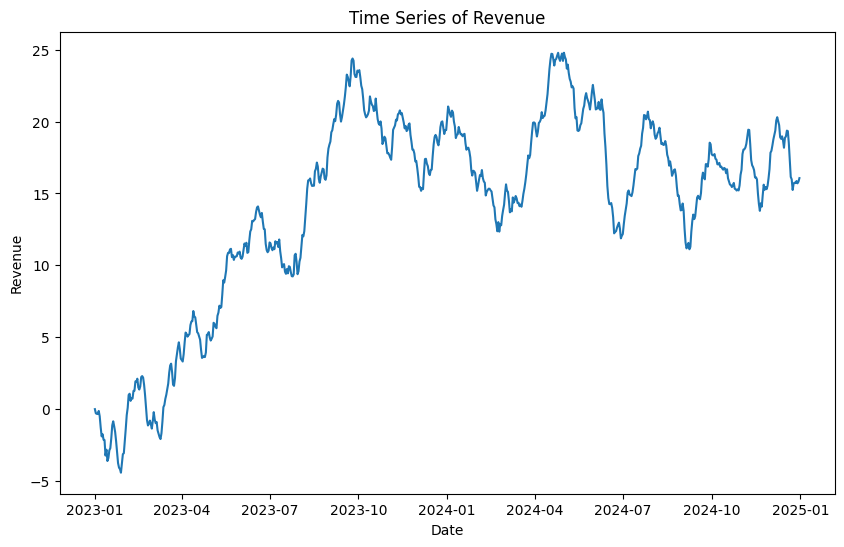

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

revData = df


# Convert the 'Day' column to datetime format starting from 1/1/2023
revData['Date'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(revData['Day'] - 1, unit='D')

# Set the 'Date' column as the index and set the frequency to daily
revData.set_index('Date', inplace=True)
revData = revData.asfreq('D')
revData = revData.drop('Day', axis=1)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(revData['Revenue'])
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Time Series of Revenue')
plt.show()




Step 4: D2: The time series data is formatted with daily time steps, starting from January 1, 2023. The 'Day' column has been converted to a datetime format, and the 'Date' column is set as the index with a daily frequency. The dataset contains 731 observations, representing a continuous sequence of daily revenue data over 2 years without any gaps in measurement.


In [73]:

# Check for missing data
print("If there were no missing rows, there would be 731 rows of minute data")
print("The actual length of the DataFrame is:", len(revData))
if len(revData) == 731:
    print("There are no missing values.\n")
else:
    # Everything
    set_everything = set(range(731))

    # The revenue index as a set
    set_revenue = set(revData.index)

    # Calculate the difference
    set_missing = set_everything - set_revenue

    # Print the difference
    print("Missing rows: ", set_missing)

    # Fill in the missing rows
    revData = revData.reindex(range(731), method='ffill')



If there were no missing rows, there would be 731 rows of minute data
The actual length of the DataFrame is: 731
There are no missing values.



Step 5: D3: Evaluate the stationarity of the time series. The time series is not stationary.

In [74]:
from statsmodels.tsa.stattools import adfuller

# Function to check the stationarity of a time series
def check_stationarity(series, significance_level=0.05):
    result = adfuller(series.dropna())
    p_value = result[1]
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return p_value <= significance_level

# Check stationarity
is_stationary = check_stationarity(revData['Revenue'])
print(f'The time series is {"stationary" if is_stationary else "not stationary"}.')


ADF Statistic: -2.218319047608946
p-value: 0.19966400615064328
The time series is not stationary.


Since the time series is not stationary, the data will be differenced. The time series must be stationary, otherwise the analysis may be unreliable. 

In [75]:
# Track the number of differencing steps
differencing_steps = 0

# Apply differencing and recheck for stationarity until the data becomes stationary
if not check_stationarity(revData['Revenue']):
    print("The time series is not stationary. Applying differencing.")
    revData_diff= revData.diff()
    revData_diff.dropna(inplace=True)
    differencing_steps += 1

ADF Statistic: -2.218319047608946
p-value: 0.19966400615064328
The time series is not stationary. Applying differencing.


Step 6: D4. Explain the steps used to prepare the data for analysis, including the training and test set split.

The data preparation process involved the following steps:
1. Reading the CSV file into a DataFrame.
2. Checking for missing rows.
3. Converting the 'Day' column to a datetime format starting from January 1, 2023.
4. Setting the 'Date' column as the index and setting the frequency to daily.
5. Splitting the data into training and test sets, with 80% of the data used for training and 20% for testing.
6. Evaluate for stationarity. 
7. Non-stationary data must be differenced. 
8. Analyze differenced data.


In [76]:
# Split the data into training and test sets
train_size = int(len(revData_diff) * 0.8)
train, test = revData_diff.iloc[:train_size], revData.iloc[train_size:]

train_original, test_original = revData.iloc[:train_size], revData.iloc[train_size:]

Step 7: D5. Provide a copy of the cleaned dataset.

In [77]:
# Save the cleaned dataset to a CSV file
revData_diff.to_csv('cleaned_data.csv')


E.  Analyze the time series dataset by doing the following:

1.  Report the annotated findings with visualizations of your data analysis, including the following elements:

    •   trends

    •   the autocorrelation function

    •   the spectral density

    •   the decomposed time series

    •   confirmation of the lack of trends in the residuals of the decomposed series

2.  Identify an autoregressive integrated moving average (ARIMA) model that accounts for the observed trend and seasonality of the time series data.

3.  Perform a forecast using the derived ARIMA model identified in part E2.

4.  Provide the output and calculations of the analysis you performed.

Step 8: E1. Report the annotated findings with visualizations of your data analysis, including the following elements:

• trends

• the autocorrelation function

• the spectral density

• the decomposed time series

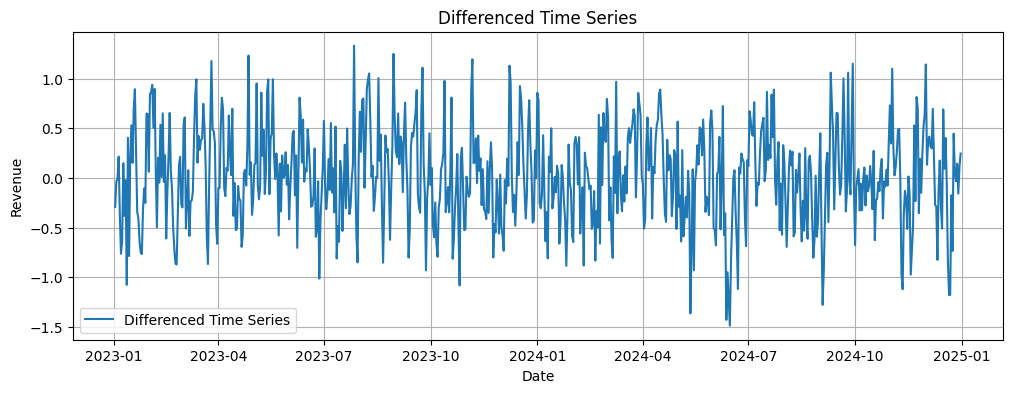

Shapiro-Wilk Test: Statistics=0.998, p=0.600
Differenced data follows a normal distribution (fail to reject H0)


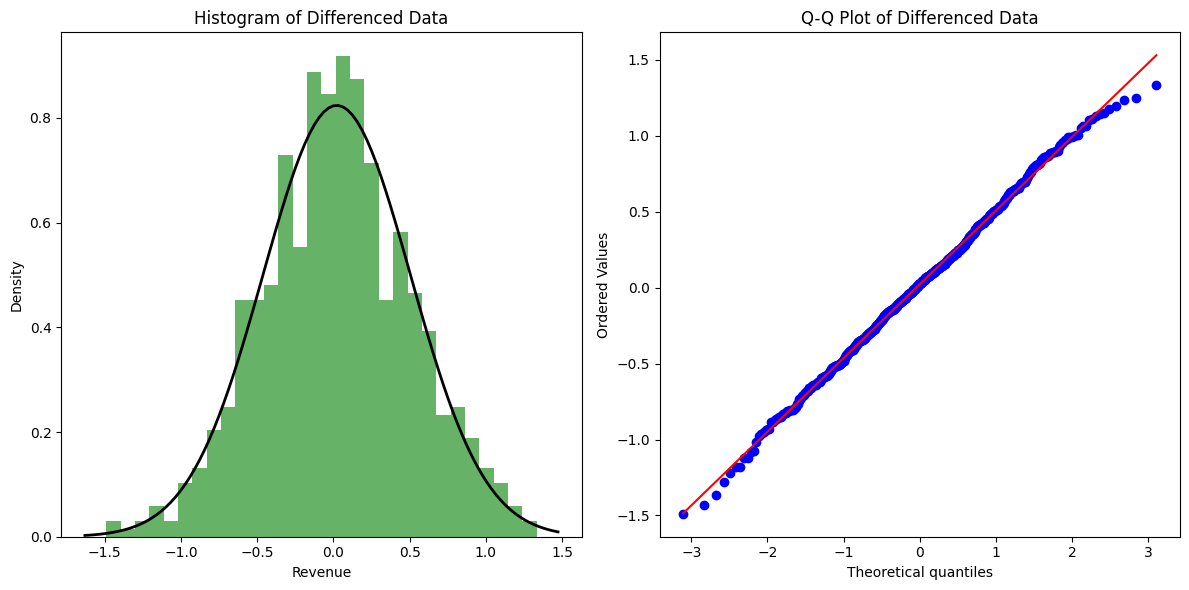

In [78]:
from scipy.stats import shapiro, norm, probplot

# Plot the differenced time series
plt.figure(figsize=(12, 4))
plt.plot(revData_diff.index, revData_diff['Revenue'], label='Differenced Time Series')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Check for normality of the differenced data
stat, p = shapiro(revData_diff['Revenue'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Differenced data follows a normal distribution (fail to reject H0)')
else:
    print('Differenced data does not follow a normal distribution (reject H0)')

# Plot the histogram and Q-Q plot of the differenced data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(revData_diff['Revenue'], bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, revData_diff['Revenue'].mean(), revData_diff['Revenue'].std())
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Differenced Data')
plt.xlabel('Revenue')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
probplot(revData_diff['Revenue'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Differenced Data')

plt.tight_layout()
plt.show()



Comments: The above graphs indicate that any trends in the data are the result of a random walk. The differenced time series is stationary, meaning that the mean and standard deviation do not change with time. The histogram of the values shows a normal distribution.

             Revenue
Date                
2023-01-02 -0.292356
2023-01-03 -0.035416
2023-01-04 -0.012215
2023-01-05  0.215100
2023-01-06 -0.366702
...              ...
2024-12-27 -0.032693
2024-12-28  0.143766
2024-12-29 -0.156834
2024-12-30  0.113880
2024-12-31  0.246562

[730 rows x 1 columns]


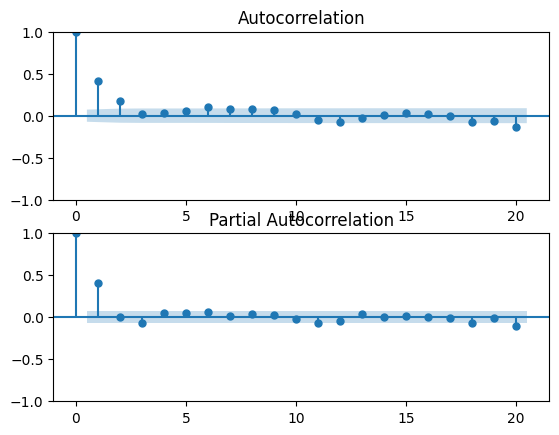

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print(revData_diff)

# Plot the ACF and PACF on the differenced dataset
fig, axes = plt.subplots(2,1)
# Plot the ACF
plot_acf(revData_diff, lags=20, ax=axes[0])
# Plot the PACF
plot_pacf(revData_diff, lags=20, ax=axes[1])
plt.show()


Comments: The autocorrelation does not show seasonality. It also suggests that an AR(2) model would fit.

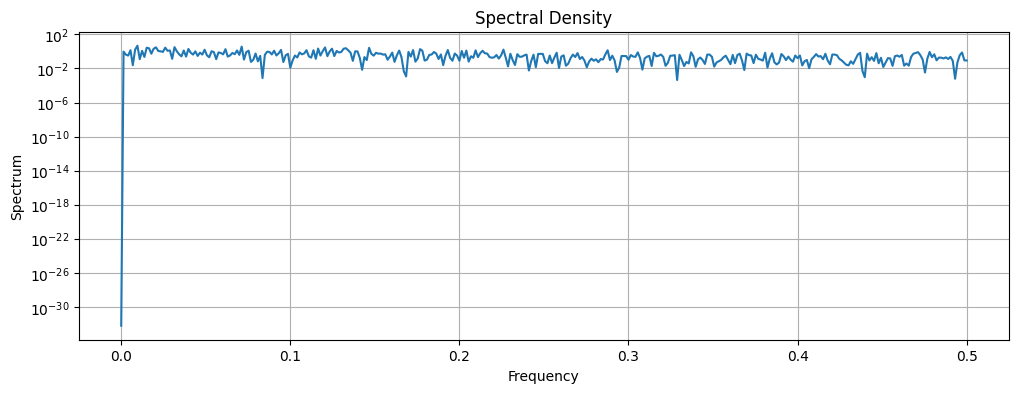

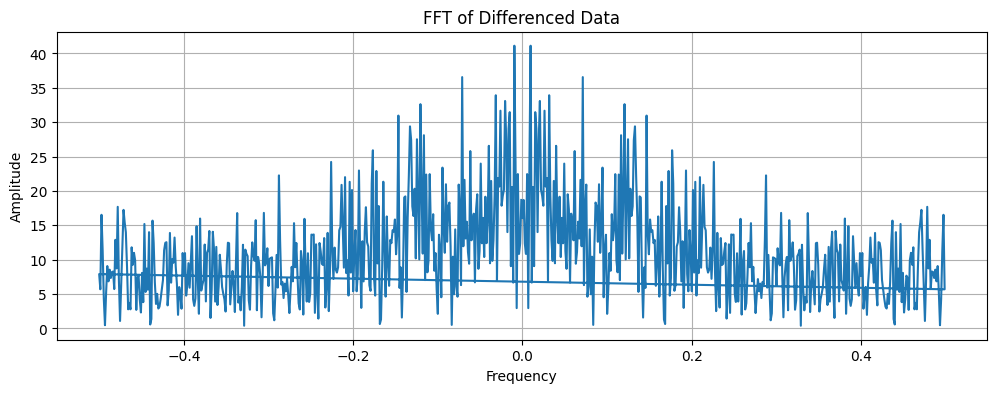

In [80]:
from scipy.signal import periodogram

# Plot the spectral density
frequencies, spectrum = periodogram(revData_diff['Revenue'])
plt.figure(figsize=(12, 4))
plt.semilogy(frequencies, spectrum)
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectrum')
plt.grid(True)
plt.show()

# Apply FFT to the differenced data
fft_result = np.fft.fft(revData_diff['Revenue'])
freq = np.fft.fftfreq(len(revData_diff['Revenue']))

# Plot the FFT result
plt.figure(figsize=(12, 4))
plt.plot(freq, np.abs(fft_result))
plt.title('FFT of Differenced Data')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Comments:
The above graphs show a lack of seasonlity, with no outliers or remarkable behavior.

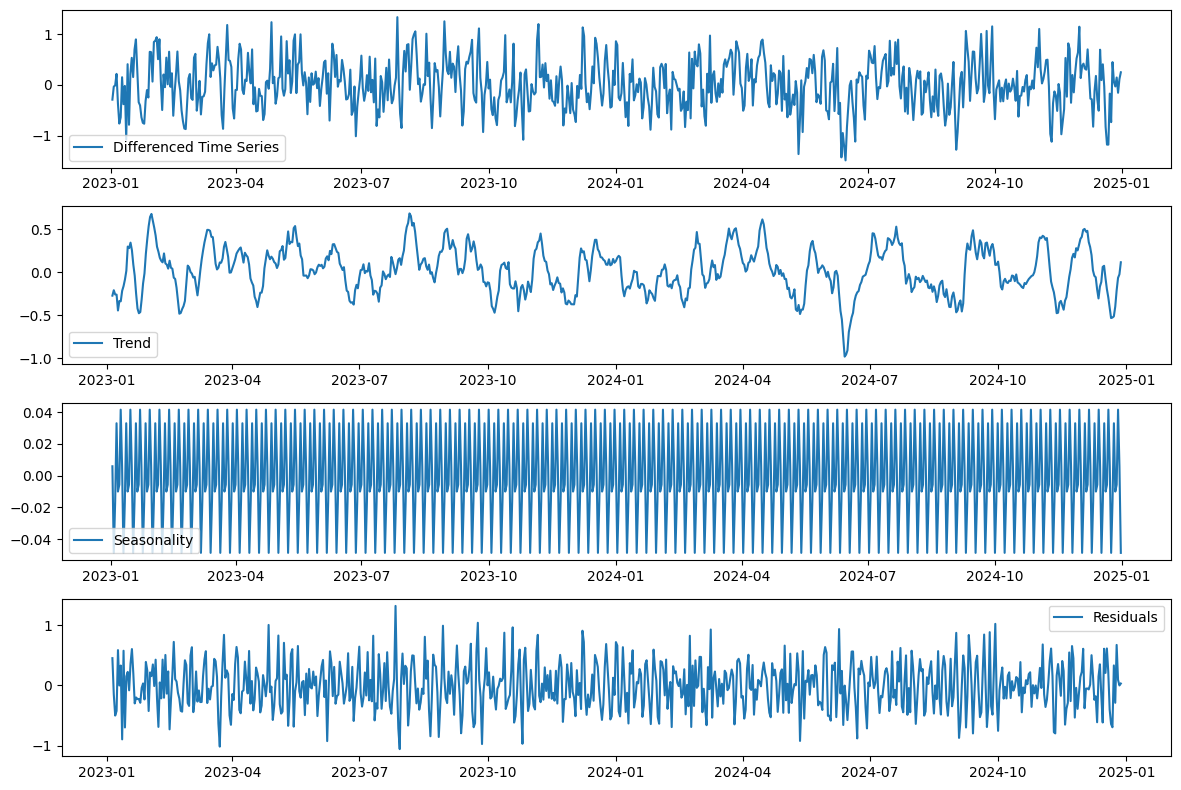

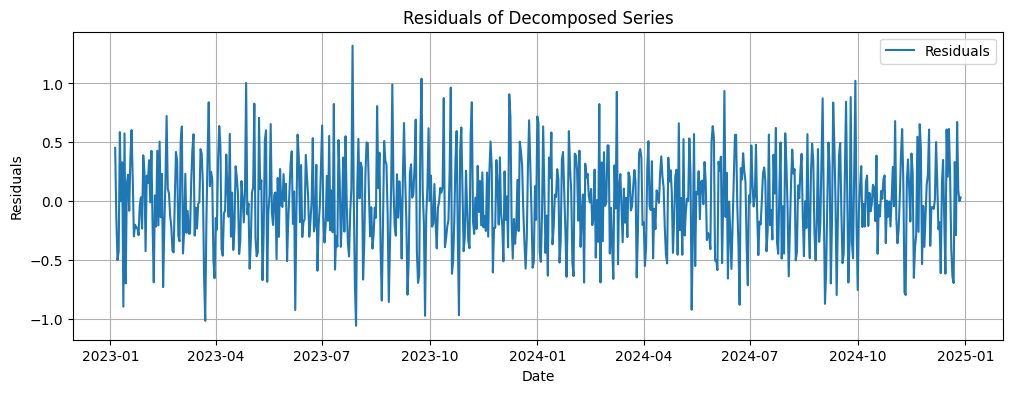

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series
decomposition = seasonal_decompose(revData_diff, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(revData_diff, label='Differenced Time Series')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Confirm lack of trends in the residuals
plt.figure(figsize=(12, 4))
plt.plot(residual, label='Residuals')
plt.title('Residuals of Decomposed Series')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


Comments: The above decomposed series further illustrate the lack of seasonlity and positive trend or drift in the data. This time series is the product of a random walk. 

E2. Identify an autoregressive integrated moving average (ARIMA) model that accounts for the observed trend and seasonality of the time series data.

Training:

In [82]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

# Perform grid search to determine the best parameters for ARIMA model on training data
p = range(0, 5)
d = differencing_steps
q = range(0, 5)
pdq = list(itertools.product(p, [d], q))

best_aic_train = np.inf
best_pdq_train = None
best_model_train = None

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        results = model.fit()
        if results.aic < best_aic_train:
            best_aic_train = results.aic
            best_pdq_train = param
            best_model_train = results
    except:
        continue

print(f'Best ARIMA model for training data: ARIMA{best_pdq_train} - AIC:{best_aic_train} \n\n')
print(best_model_train.summary())

# Calculate residuals and mean absolute error for training data
residuals_train = best_model_train.resid
mae_train = np.mean(np.abs(residuals_train))
print('Mean absolute error for training data:', mae_train)


C:\Users\gabri\PycharmProjects\d603-machine-learning\new_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gabri\PycharmProjects\d603-machine-learning\new_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\gabri\PycharmProjects\d603-machine-learning\new_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\gabri\PycharmProjects\d603-machine-learning\new_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

Best ARIMA model for training data: ARIMA(0, 1, 3) - AIC:708.165486452124 


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  584
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -350.083
Date:                Wed, 25 Dec 2024   AIC                            708.165
Time:                        19:40:04   BIC                            725.638
Sample:                    01-02-2023   HQIC                           714.976
                         - 08-07-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6073      0.168     -3.623      0.000      -0.936      -0.279
ma.L2         -0.1715      0.083     -2.060      0.039

C:\Users\gabri\PycharmProjects\d603-machine-learning\new_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test:

In [83]:
# Perform grid search to determine the best parameters for ARIMA model on test data
best_aic_test = np.inf
best_pdq_test = None
best_model_test = None

for param in pdq:
    try:
        model = ARIMA(test, order=param)
        results = model.fit()
        if results.aic < best_aic_test:
            best_aic_test = results.aic
            best_pdq_test = param
            best_model_test = results
    except:
        continue

print(f'Best ARIMA model for test data: ARIMA{best_pdq_test} - AIC:{best_aic_test}')
print(best_model_test.summary())

# Calculate residuals and mean absolute error for test data
residuals_test = best_model_test.resid
mae_test = np.mean(np.abs(residuals_test))
print('Mean absolute error for test data:', mae_test)


C:\Users\gabri\PycharmProjects\d603-machine-learning\new_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gabri\PycharmProjects\d603-machine-learning\new_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\gabri\PycharmProjects\d603-machine-learning\new_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gabri\PycharmProjects\d603-machine-learning\new_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

Best ARIMA model for test data: ARIMA(2, 1, 1) - AIC:176.47457005219155
                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  147
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -84.237
Date:                Wed, 25 Dec 2024   AIC                            176.475
Time:                        19:40:17   BIC                            188.409
Sample:                    08-07-2024   HQIC                           181.324
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4391      0.091     -4.808      0.000      -0.618      -0.260
ar.L2          0.3044      0.101      3.016      0.003     

C:\Users\gabri\PycharmProjects\d603-machine-learning\new_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


E3. Perform a forecast using the derived ARIMA model identified in part E2.

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  147
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -84.237
Date:                Wed, 25 Dec 2024   AIC                            176.475
Time:                        19:40:17   BIC                            188.409
Sample:                    08-07-2024   HQIC                           181.324
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4391      0.091     -4.808      0.000      -0.618      -0.260
ar.L2          0.3044      0.101      3.016      0.003       0.107       0.502
ma.L1          0.9378      0.061     15.456      0.0

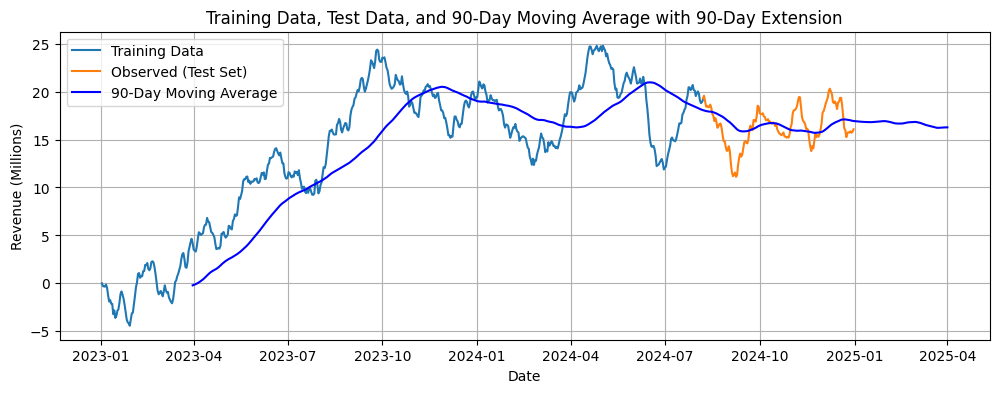

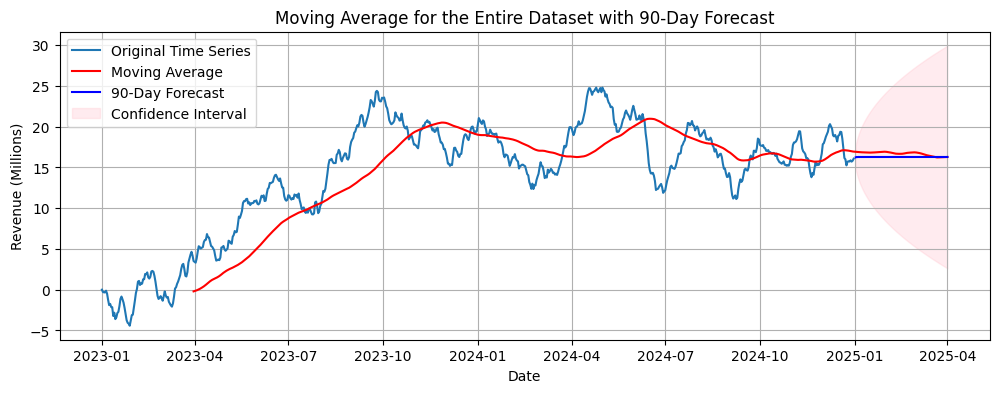

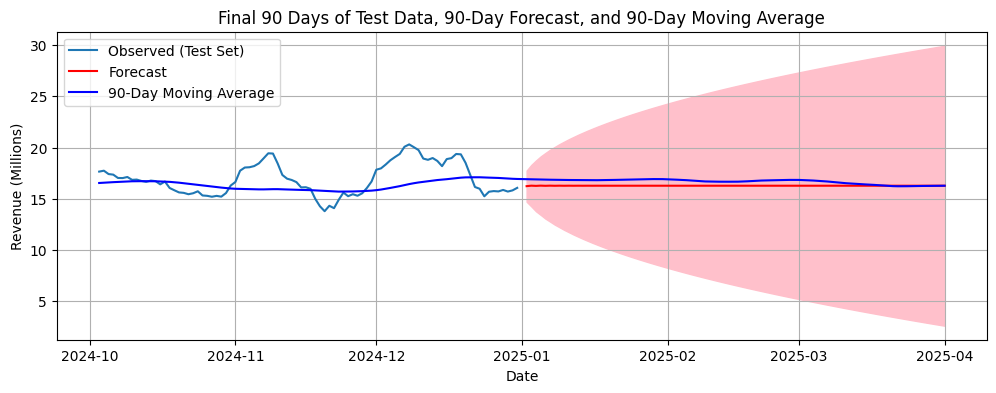

In [84]:
# Fit ARIMA model on test data
model_test = ARIMA(test_original, order=best_pdq_test)
results_test = model_test.fit()
print(results_test.summary())

# Calculate mean absolute error for test data
mae_test = np.mean(np.abs(results_test.resid))
print('Mean absolute error for test data:', mae_test)

# Calculate MAE for the forecast created by the training data on the test data
forecast_test = best_model_train.get_forecast(steps=len(test))
mean_forecast_test = forecast_test.predicted_mean
mae_forecast_test = np.mean(np.abs(mean_forecast_test - test['Revenue']))
print('Mean absolute error for training forecast on test data:', mae_forecast_test)


# Generate predictions and confidence intervals for test data
prediction = results_test.get_prediction(start=-146, end=len(test) + 90)  # Extend forecast by 90 days
mean_prediction = prediction.predicted_mean
confidence_intervals = prediction.conf_int()
lower_limit = confidence_intervals.iloc[:, 0]
upper_limit = confidence_intervals.iloc[:, 1]


# Calculate the 90-day moving average for the test set and extend it by an additional 90 days using the ARIMA model
extended_test = pd.concat([train_original['Revenue'], test_original['Revenue'], mean_prediction[-90:]])
moving_average_90_extended = extended_test.rolling(window=90).mean()

# Plot the training data, test data, and the 90-day moving average with its confidence interval
plt.figure(figsize=(12, 4))
plt.plot(train.index, train_original['Revenue'], label='Training Data')
plt.plot(test.index, test_original['Revenue'], label='Observed (Test Set)')
plt.plot(moving_average_90_extended.index, moving_average_90_extended, color='b', label='90-Day Moving Average')
plt.title('Training Data, Test Data, and 90-Day Moving Average with 90-Day Extension')
plt.xlabel('Date')
plt.ylabel('Revenue (Millions)')
plt.legend()
plt.grid(True)
plt.show()


# Extend the moving average by an additional 90 days
extended_moving_average = pd.concat([revData['Revenue'], mean_prediction[-90:]]).rolling(window=90).mean()

# Plot the moving average for the entire dataset with the 90-day forecast and confidence interval
plt.figure(figsize=(12, 4))
plt.plot(revData.index, revData['Revenue'], label='Original Time Series')
plt.plot(extended_moving_average.index, extended_moving_average, color='r', label='Moving Average')
plt.plot(mean_prediction.index[-90:], mean_prediction[-90:], color='b', label='90-Day Forecast')
plt.fill_between(lower_limit.index[-90:], lower_limit[-90:], upper_limit[-90:], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Moving Average for the Entire Dataset with 90-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue (Millions)')
plt.legend()
plt.grid(True)
plt.show()


# Plot the final 90 days of the test data, the 90-day forecast with the confidence interval, and the 90-day moving average
plt.figure(figsize=(12, 4))
plt.plot(test.index[-90:], test['Revenue'][-90:], label='Observed (Test Set)')
plt.plot(mean_prediction.index[-90:], mean_prediction[-90:], color='r', label='Forecast')
plt.fill_between(lower_limit.index[-90:], lower_limit[-90:], upper_limit[-90:], color='pink')
plt.plot(extended_moving_average.index[-180:], extended_moving_average[-180:], color='b', label='90-Day Moving Average')
plt.title('Final 90 Days of Test Data, 90-Day Forecast, and 90-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Revenue (Millions)')
plt.legend()
plt.grid(True)
plt.show()


E4. Provide the output and calculations of the analysis you performed.

In [85]:
print(f'Best ARIMA model for training data: ARIMA{best_pdq_train} - AIC:{best_aic_train}')
print('Mean absolute error for training data:', mae_train)

print('Mean absolute error for training forecast on test data:', mae_forecast_test)

print(f'Best ARIMA model for test data: ARIMA{best_pdq_test} - AIC:{best_aic_test}')
print('Mean absolute error for test data:', mae_test)

Best ARIMA model for training data: ARIMA(0, 1, 3) - AIC:708.165486452124
Mean absolute error for training data: 0.35769012603168665
Mean absolute error for training forecast on test data: 16.381783864615834
Best ARIMA model for test data: ARIMA(2, 1, 1) - AIC:176.47457005219155
Mean absolute error for test data: 0.4752220789904313


Step F: Summarize Your Findings and Assumptions
1. Discuss the results of your data analysis, including the following:

*   The Selection of an ARIMA Model

        The ARIMA model was selected using the using a grid search and the ARIMA method, which identified the best model parameters based on the lowest AIC. The AIC finds models that fit well and penalizes for overfitting, meaning that the model with the lowest AIC will not be over- or under-fitted. The selected model accounts for the (lack of) observed trend and seasonality in the time series data. The best parameters (p, d, q) are (2, 1, 1) respectively, which fits the discoveries of the ACF plot.

*   The Prediction Interval of the Forecast

        The prediction interval of the forecast provides a range within which the true values are expected to lie with a certain probability, with alpha set to 0.05. The confidence intervals were calculated for both the test data forecast and the extended forecast.

*   A Justification of the Forecast Length

        The forecast was extended to 90 days past the final date to provide a comprehensive view of the future revenue trends over the subsequent financial quarter. This length was chosen as most financial metrics, like revenue, are measured by quarter (three months), allowing for better planning and decision-making. With two years of data, only one quarter was appropriate.

*   The Model Evaluation Procedure and Error Metric

        The model evaluation procedure involved calculating the Mean Absolute Error (MAE) for the training and test forecasts. The MAE is a common error metric used to assess the accuracy of the forecast by measuring the absolute difference between the observed and predicted values. The best forecast should minimize the MAE, which while the training data had a lower MAE of 0.3587 compared to test's 0.4752, when the training forecast was applied to the test data, the MAE spiked. This means that using fresher data is better for forecasting. 


F2.  Provide an annotated visualization of the forecast of the final model compared to the test set that includes the following:

•   the original output with the new prediction line and confidence cone

•   correct labeling

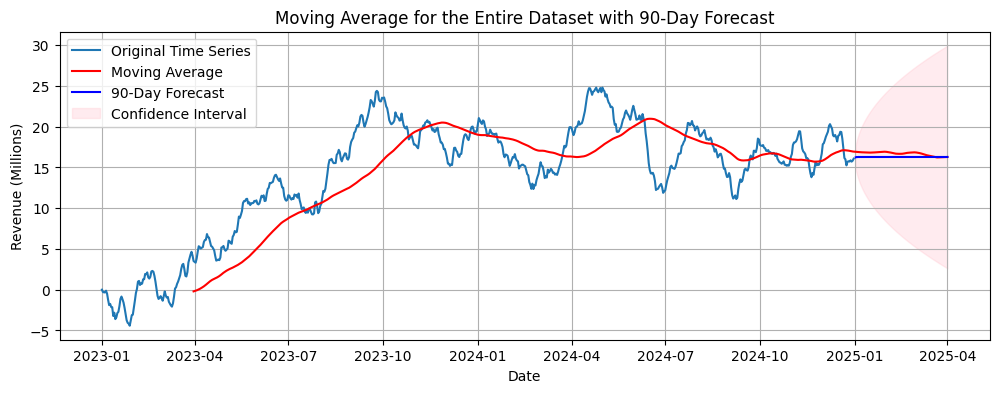

In [86]:
# Plot the moving average for the entire dataset with the 90-day forecast and confidence interval
plt.figure(figsize=(12, 4))
plt.plot(revData.index, revData['Revenue'], label='Original Time Series')
plt.plot(extended_moving_average.index, extended_moving_average, color='r', label='Moving Average')
plt.plot(mean_prediction.index[-90:], mean_prediction[-90:], color='b', label='90-Day Forecast')
plt.fill_between(lower_limit.index[-90:], lower_limit[-90:], upper_limit[-90:], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Moving Average for the Entire Dataset with 90-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue (Millions)')
plt.legend()
plt.grid(True)
plt.show()
